<a href="https://colab.research.google.com/github/SivaTeja60/Linear_Regression_Introduction/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [16]:
# libraries for numerical
import pandas as pd  
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt  
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

Load Dataset

In [17]:
#Load Data Set
liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [18]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


In [19]:
liver_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,496.000000,500.000000
mean,44.5860,2.603800,1.117200,296.372000,82.736000,108.820000,6.44480,3.168800,0.960907,1.300000
std,16.5334,5.120238,2.066709,257.461676,194.366775,307.093557,1.08902,0.799741,0.294289,0.458717
min,4.0000,0.400000,0.100000,63.000000,10.000000,10.000000,2.70000,0.900000,0.300000,1.000000
25%,32.7500,0.800000,0.200000,175.000000,23.000000,24.750000,5.70000,2.600000,0.795000,1.000000
50%,45.0000,0.900000,0.300000,205.500000,33.500000,40.000000,6.50000,3.100000,1.000000,1.000000
75%,58.0000,2.200000,1.000000,298.000000,59.250000,79.250000,7.20000,3.800000,1.100000,2.000000
max,85.0000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.60000,5.500000,1.900000,2.000000


In [20]:
#Drop Null Values
#liver_data['Albumin_and_Globulin_Ratio']=liver_data['Albumin_and_Globulin_Ratio'].replace({'NAN':np.nan}).astype(float)
#df['Age'] = df['Age'].replace({'NAN':np.nan}).astype(float)
#liver_data["Albumin_and_Globulin_Ratio"].fillna(value=liver_data["Albumin_and_Globulin_Ratio"].mean())
liver_data=liver_data.dropna()


In [21]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         496 non-null    int64  
 1   Gender                      496 non-null    object 
 2   Total_Bilirubin             496 non-null    float64
 3   Direct_Bilirubin            496 non-null    float64
 4   Alkaline_Phosphotase        496 non-null    int64  
 5   Alamine_Aminotransferase    496 non-null    int64  
 6   Aspartate_Aminotransferase  496 non-null    int64  
 7   Total_Protiens              496 non-null    float64
 8   Albumin                     496 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               496 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 46.5+ KB


Dropping Rows

In [22]:
dummies = []

cols = ['Gender']
for col in cols:
    dummies.append(pd.get_dummies(liver_data[col]))
liver_data_dummies = pd.concat(dummies, axis=1)  

Concat 

In [23]:
liver_data = pd.concat((liver_data,liver_data_dummies), axis=1)

Drop Gender Col

In [24]:
liver_data = liver_data.drop(['Gender'], axis=1)

In [25]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         496 non-null    int64  
 1   Total_Bilirubin             496 non-null    float64
 2   Direct_Bilirubin            496 non-null    float64
 3   Alkaline_Phosphotase        496 non-null    int64  
 4   Alamine_Aminotransferase    496 non-null    int64  
 5   Aspartate_Aminotransferase  496 non-null    int64  
 6   Total_Protiens              496 non-null    float64
 7   Albumin                     496 non-null    float64
 8   Albumin_and_Globulin_Ratio  496 non-null    float64
 9   Liver_Problem               496 non-null    int64  
 10  Female                      496 non-null    uint8  
 11  Male                        496 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 43.6 KB


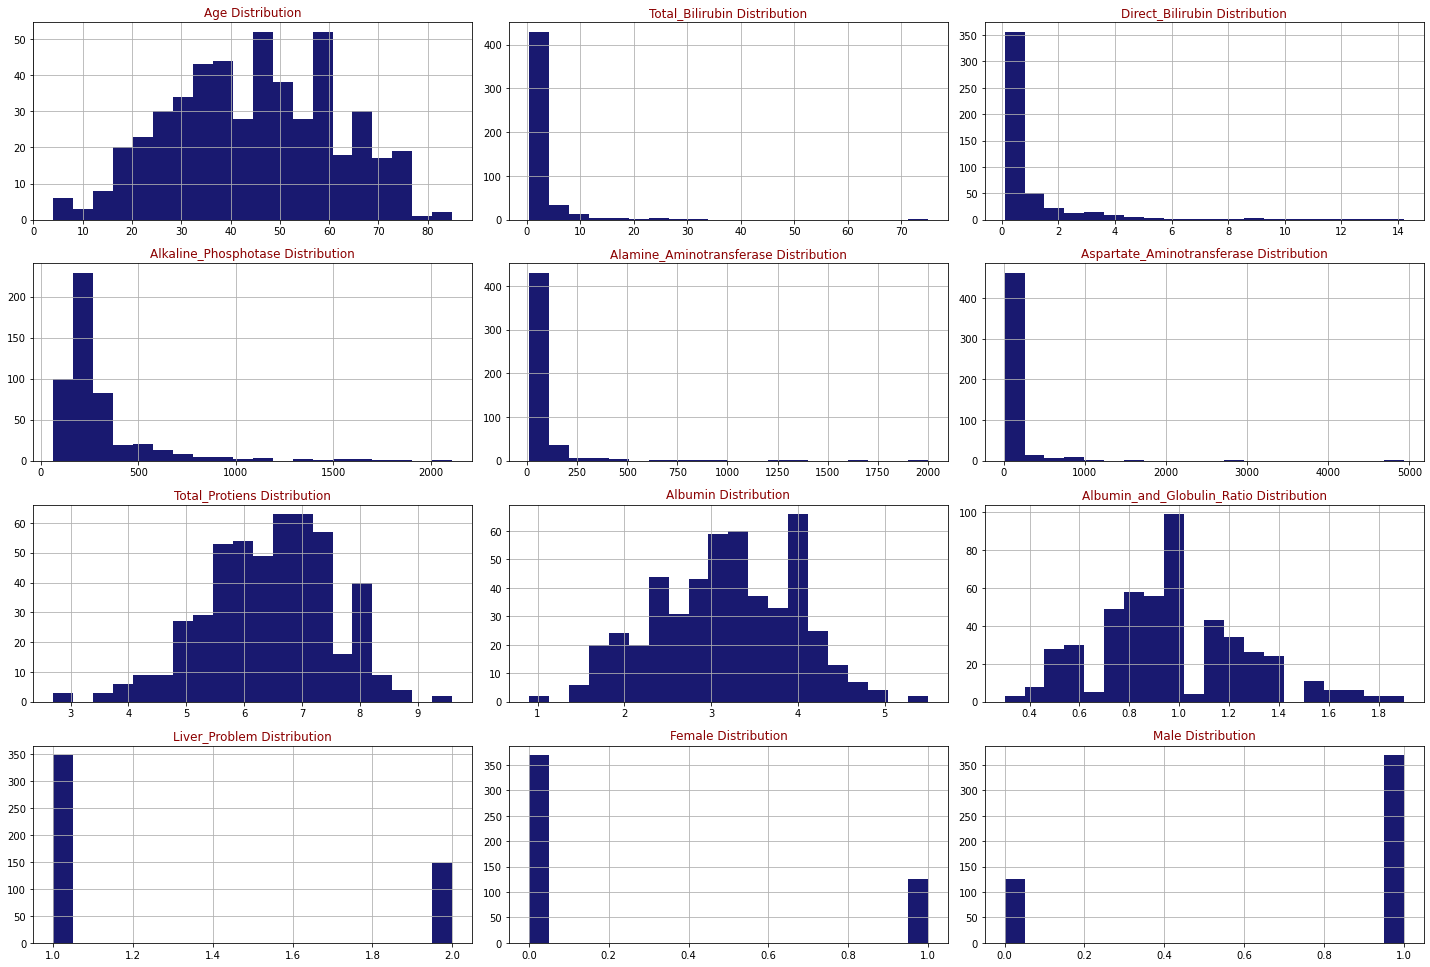

In [26]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(liver_data,liver_data.columns,6,3)

Train Model

In [27]:
import sklearn
#new_features=liver_data.columns[:]
col_name = liver_data.drop('Liver_Problem', axis = 1).columns[:]
x = liver_data.loc[:, col_name]
y = liver_data['Liver_Problem']
#x=new_features.loc[:,:-1]
#y=new_features.loc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)


In [34]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression

In [35]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.65

Load New Dataset

In [37]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')
test_new.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,36,Male,2.8,1.5,305,28,76,5.9,2.5,0.7
1,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.2
2,53,Male,19.8,10.4,238,39,221,8.1,2.5,0.4
3,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9
4,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1


Dropping Rows and Concat

In [41]:
dummies = []

cols = ['Gender']
for col in cols:
    dummies.append(pd.get_dummies(test_new[col]))
test_new_dummies = pd.concat(dummies, axis=1)  
test_new = pd.concat((test_new,test_new_dummies), axis=1)
test_new = test_new.drop(['Gender'], axis=1)
test_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         82 non-null     int64  
 1   Total_Bilirubin             82 non-null     float64
 2   Direct_Bilirubin            82 non-null     float64
 3   Alkaline_Phosphotase        82 non-null     int64  
 4   Alamine_Aminotransferase    82 non-null     int64  
 5   Aspartate_Aminotransferase  82 non-null     int64  
 6   Total_Protiens              82 non-null     float64
 7   Albumin                     82 non-null     float64
 8   Albumin_and_Globulin_Ratio  82 non-null     float64
 9   Female                      82 non-null     uint8  
 10  Male                        82 non-null     uint8  
dtypes: float64(5), int64(4), uint8(2)
memory usage: 6.1 KB


In [42]:
Liver_Problem=logreg.predict(test_new)

In [44]:
res=pd.DataFrame(Liver_Problem)
res.index=test_new.index
res.columns=["Liver_Problem"]

In [45]:
from google.colab import files
res.to_csv('prediciton_results_Liv.csv')
files.download('prediciton_results_Liv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>